In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
train_data=pd.read_csv('train.csv')
train_data.iloc[:,1:]=train_data.iloc[:,1:]/255 # normalize to 1, 255 is max
test_data=pd.read_csv('test.csv')
test_data=test_data/255 # normalize to 1, 255 is max

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_data.iloc[:,1:].max().max(),train_data.iloc[:,1:].min().min()

(1.0, 0.0)

In [5]:
test_data.max().max(),test_data.min().min()

(1.0, 0.0)

In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def showimage(row_num):
    a=255*train_data.iloc[row_num,1:].values
    a=a.reshape(28,28).astype('uint8')
    plt.imshow(a)

<IPython.core.display.Javascript object>


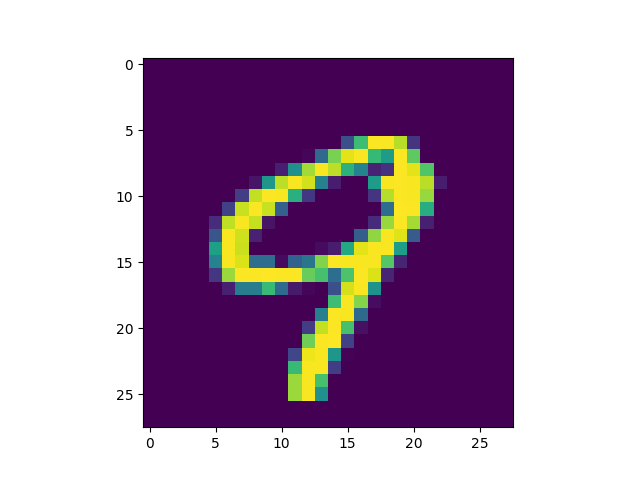

In [13]:
showimage(100)

## Train test split

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [21]:
X_train,X_test,y_train,y_test=train_test_split(train_data.iloc[:,1:],train_data.iloc[:,0],random_state=7)

In [16]:
from sklearn.model_selection import GridSearchCV

In [20]:
train_data.shape[0]+test_data.shape[0]

70000

## Lets use neural networks

In [12]:
from sklearn.neural_network import MLPClassifier

### Lets check how random_state changes accuracy in MLP Classifier with default settings

In [14]:
param_grid={'random_state':[0,1,2,3,4,5,6,7,8,9,10,11,12,13]}
grid=GridSearchCV(MLPClassifier(),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

[mean: 0.96710, std: 0.00394, params: {'random_state': 0},
 mean: 0.97052, std: 0.00143, params: {'random_state': 1},
 mean: 0.96879, std: 0.00169, params: {'random_state': 2},
 mean: 0.96988, std: 0.00117, params: {'random_state': 3},
 mean: 0.96983, std: 0.00131, params: {'random_state': 4},
 mean: 0.96821, std: 0.00300, params: {'random_state': 5},
 mean: 0.96819, std: 0.00049, params: {'random_state': 6},
 mean: 0.96700, std: 0.00262, params: {'random_state': 7},
 mean: 0.97029, std: 0.00209, params: {'random_state': 8},
 mean: 0.96990, std: 0.00123, params: {'random_state': 9},
 mean: 0.96760, std: 0.00151, params: {'random_state': 10},
 mean: 0.97014, std: 0.00174, params: {'random_state': 11},
 mean: 0.96860, std: 0.00152, params: {'random_state': 12},
 mean: 0.96871, std: 0.00157, params: {'random_state': 13}]

In [16]:
param_grid={'hidden_layer_sizes':[[200],[200,100],[200,100,50],[200,100,50,20],[200,100,50,20,10]]}
grid=GridSearchCV(MLPClassifier(random_state=1),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

[mean: 0.97271, std: 0.00065, params: {'hidden_layer_sizes': [200]},
 mean: 0.97255, std: 0.00325, params: {'hidden_layer_sizes': [200, 100]},
 mean: 0.97043, std: 0.00199, params: {'hidden_layer_sizes': [200, 100, 50]},
 mean: 0.96755, std: 0.00173, params: {'hidden_layer_sizes': [200, 100, 50, 20]},
 mean: 0.96086, std: 0.00511, params: {'hidden_layer_sizes': [200, 100, 50, 20, 10]}]

In [17]:
param_grid={'hidden_layer_sizes':[400,300,200,100,70,50,20,10]}
grid=GridSearchCV(MLPClassifier(random_state=1),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

[mean: 0.97590, std: 0.00111, params: {'hidden_layer_sizes': 400},
 mean: 0.97300, std: 0.00300, params: {'hidden_layer_sizes': 300},
 mean: 0.97271, std: 0.00065, params: {'hidden_layer_sizes': 200},
 mean: 0.97052, std: 0.00143, params: {'hidden_layer_sizes': 100},
 mean: 0.96507, std: 0.00262, params: {'hidden_layer_sizes': 70},
 mean: 0.96448, std: 0.00150, params: {'hidden_layer_sizes': 50},
 mean: 0.94531, std: 0.00378, params: {'hidden_layer_sizes': 20},
 mean: 0.92945, std: 0.00320, params: {'hidden_layer_sizes': 10}]

In [18]:
param_grid={'hidden_layer_sizes':[450,500,550,600,650,700,750]}
grid=GridSearchCV(MLPClassifier(random_state=1),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

[mean: 0.97560, std: 0.00083, params: {'hidden_layer_sizes': 450},
 mean: 0.97567, std: 0.00073, params: {'hidden_layer_sizes': 500},
 mean: 0.97569, std: 0.00100, params: {'hidden_layer_sizes': 550},
 mean: 0.97607, std: 0.00117, params: {'hidden_layer_sizes': 600},
 mean: 0.97612, std: 0.00151, params: {'hidden_layer_sizes': 650},
 mean: 0.97652, std: 0.00133, params: {'hidden_layer_sizes': 700},
 mean: 0.97631, std: 0.00108, params: {'hidden_layer_sizes': 750}]

In [20]:
param_grid={'hidden_layer_sizes':[800,850,900,1000,1100,1200]}
grid=GridSearchCV(MLPClassifier(random_state=1),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

[mean: 0.97638, std: 0.00127, params: {'hidden_layer_sizes': 800},
 mean: 0.97590, std: 0.00165, params: {'hidden_layer_sizes': 850},
 mean: 0.97676, std: 0.00102, params: {'hidden_layer_sizes': 900},
 mean: 0.97679, std: 0.00107, params: {'hidden_layer_sizes': 1000},
 mean: 0.97679, std: 0.00071, params: {'hidden_layer_sizes': 1100},
 mean: 0.97340, std: 0.00625, params: {'hidden_layer_sizes': 1200}]

In [19]:
param_grid={'hidden_layer_sizes':[[700,400],[700,400,200],[700,400,200,100],[700,400,200,100,50],[700,400,200,100,50,20]]}
grid=GridSearchCV(MLPClassifier(random_state=1),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

[mean: 0.97569, std: 0.00052, params: {'hidden_layer_sizes': [700, 400]},
 mean: 0.97600, std: 0.00180, params: {'hidden_layer_sizes': [700, 400, 200]},
 mean: 0.97138, std: 0.00080, params: {'hidden_layer_sizes': [700, 400, 200, 100]},
 mean: 0.97410, std: 0.00110, params: {'hidden_layer_sizes': [700, 400, 200, 100, 50]},
 mean: 0.97226, std: 0.00121, params: {'hidden_layer_sizes': [700, 400, 200, 100, 50, 20]}]

In [29]:
nn=MLPClassifier(hidden_layer_sizes=[900],random_state=1).fit(train_data.iloc[:,1:],train_data.iloc[:,0])



In [30]:
nn

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[900], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [33]:
y_pred=nn.predict(train_data.iloc[:,1:])
accuracy_score(train_data.iloc[:,0],y_pred)

0.99623809523809526

In [34]:
df=pd.DataFrame([])
df['ImageId']=np.arange(1,len(test_data)+1)
df['Label']=nn.predict(test_data)
df.to_csv('nn3trial900.csv',index=False)

In [35]:
param_grid={'random_state':[0,1,2,3,4,5,6,7,8,9,10,11,12,13],'hidden_layer_sizes':[[700],[700,400],[700,400,200]]}
grid=GridSearchCV(MLPClassifier(),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

[mean: 0.97276, std: 0.00575, params: {'hidden_layer_sizes': [700], 'random_state': 0},
 mean: 0.97652, std: 0.00133, params: {'hidden_layer_sizes': [700], 'random_state': 1},
 mean: 0.97483, std: 0.00257, params: {'hidden_layer_sizes': [700], 'random_state': 2},
 mean: 0.97464, std: 0.00195, params: {'hidden_layer_sizes': [700], 'random_state': 3},
 mean: 0.97324, std: 0.00444, params: {'hidden_layer_sizes': [700], 'random_state': 4},
 mean: 0.97350, std: 0.00421, params: {'hidden_layer_sizes': [700], 'random_state': 5},
 mean: 0.97626, std: 0.00156, params: {'hidden_layer_sizes': [700], 'random_state': 6},
 mean: 0.97595, std: 0.00097, params: {'hidden_layer_sizes': [700], 'random_state': 7},
 mean: 0.97681, std: 0.00109, params: {'hidden_layer_sizes': [700], 'random_state': 8},
 mean: 0.97607, std: 0.00097, params: {'hidden_layer_sizes': [700], 'random_state': 9},
 mean: 0.96943, std: 0.00552, params: {'hidden_layer_sizes': [700], 'random_state': 10},
 mean: 0.97626, std: 0.00103, p

In [36]:
print('Best Score')
print(grid.best_score_)
print('Best model')
print(grid.best_estimator_)

Best Score
0.9769285714285715
Best model
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[700], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [17]:
import sklearn
sklearn.__version__

'0.19.1'

In [22]:
param_grid={'alpha':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(MLPClassifier(random_state=1,hidden_layer_sizes=[200]),param_grid,cv=3,scoring='accuracy')
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97283, std: 0.00069, params: {'alpha': 0.001},
 mean: 0.97307, std: 0.00081, params: {'alpha': 0.01},
 mean: 0.97214, std: 0.00208, params: {'alpha': 0.1},
 mean: 0.94071, std: 0.00584, params: {'alpha': 1},
 mean: 0.86536, std: 0.01282, params: {'alpha': 10}]

In [23]:
grid.cv_results_

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: 

{'mean_fit_time': array([ 50.06158559,  44.80725765,  50.05350304,  34.92439898,  36.38743424]),
 'mean_score_time': array([ 0.14317433,  0.14801502,  0.14528163,  0.14734507,  0.14388132]),
 'mean_test_score': array([ 0.97283333,  0.97307143,  0.97214286,  0.94071429,  0.86535714]),
 'mean_train_score': array([ 0.99976191,  0.99939287,  0.99285752,  0.94900075,  0.86801305]),
 'param_alpha': masked_array(data = [0.001 0.01 0.1 1 10],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10}],
 'rank_test_score': array([2, 1, 3, 4, 5], dtype=int32),
 'split0_test_score': array([ 0.97336475,  0.97415024,  0.97507855,  0.94858612,  0.8828906 ]),
 'split0_train_score': array([ 0.99989284,  0.99957137,  0.99807115,  0.95952993,  0.88398343]),
 'split1_test_score': array([ 0.9732819 ,  0.97285326,  0.97049579,  0.93891985,  0.8526218 ]),
 'split1_train_score': array([ 1.  

In [20]:
nn=MLPClassifier(hidden_layer_sizes=[200],random_state=1).fit(X_train,y_train)
y_pred=nn.predict(X_test)
y_pred_train=nn.predict(X_train)


Train accuracy single layer 200 neurons


ValueError: Found input variables with inconsistent numbers of samples: [10500, 31500]

In [21]:
print('Train accuracy single layer 200 neurons')
print(accuracy_score(y_train,y_pred_train))
print('Test accuracy single layer 200 neurons')
print(accuracy_score(y_test,y_pred))

Train accuracy single layer 200 neurons
1.0
Test accuracy single layer 200 neurons
0.975714285714


In [18]:
param_grid={'hidden_layer_sizes':[[200],[200,100],[200,100,50],[200,100,50,20],[200,100,50,20,10]]}
grid=GridSearchCV(MLPClassifier(random_state=1),param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
grid.grid_scores_

TypeError: __init__() got an unexpected keyword argument 'return_train_score'

In [5]:
nn=MLPClassifier(verbose=10,warm_start=True).fit(X_train,y_train)
nn

Iteration 1, loss = 0.43471426
Iteration 2, loss = 0.20556213
Iteration 3, loss = 0.15416142
Iteration 4, loss = 0.12356414
Iteration 5, loss = 0.10257062
Iteration 6, loss = 0.08586438
Iteration 7, loss = 0.07395911
Iteration 8, loss = 0.06469260
Iteration 9, loss = 0.05593641
Iteration 10, loss = 0.05010502
Iteration 11, loss = 0.04461080
Iteration 12, loss = 0.03921453
Iteration 13, loss = 0.03453824
Iteration 14, loss = 0.03106020
Iteration 15, loss = 0.02792967
Iteration 16, loss = 0.02452409
Iteration 17, loss = 0.02205413
Iteration 18, loss = 0.01990611
Iteration 19, loss = 0.01722551
Iteration 20, loss = 0.01571201
Iteration 21, loss = 0.01429605
Iteration 22, loss = 0.01273820
Iteration 23, loss = 0.01132272
Iteration 24, loss = 0.01041662
Iteration 25, loss = 0.00919763
Iteration 26, loss = 0.00807811
Iteration 27, loss = 0.00742990
Iteration 28, loss = 0.00685021
Iteration 29, loss = 0.00572193
Iteration 30, loss = 0.00560572
Iteration 31, loss = 0.00456151
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=10, warm_start=True)

In [7]:
from sklearn.metrics import accuracy_score
y_predict=nn.predict(X_test)
print('Test accuracy of neural network with default settings')
print(accuracy_score(y_test,y_predict))
y_predict_train=nn.predict(X_train)
print('Train accuracy of neural network with default settings')
print(accuracy_score(y_train,y_predict_train))

Test accuracy of neural network with default settings
0.9792
Train accuracy of neural network with default settings
0.999816666667



mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

Iteration 1, loss = 2.25749605
Iteration 2, loss = 1.62138080
Iteration 3, loss = 0.89536100
Iteration 4, loss = 0.59770935
Iteration 5, loss = 0.47234338
Iteration 6, loss = 0.39842064
Iteration 7, loss = 0.35044991
Iteration 8, loss = 0.31438554
Iteration 9, loss = 0.28575745
Iteration 10, loss = 0.26276419
Iteration 11, loss = 0.24330524
Iteration 12, loss = 0.22587648
Iteration 13, loss = 0.21068529
Iteration 14, loss = 0.19710762
Iteration 15, loss = 0.18543891
Iteration 16, loss = 0.17482346
Iteration 17, loss = 0.16538028
Iteration 18, loss = 0.15642997
Iteration 19, loss = 0.14891424
Iteration 20, loss = 0.14161593
Iteration 21, loss = 0.13509260
Iteration 22, loss = 0.12879921
Iteration 23, loss = 0.12304022
Iteration 24, loss = 0.11760306
Iteration 25, loss = 0.11291989
Iteration 26, loss = 

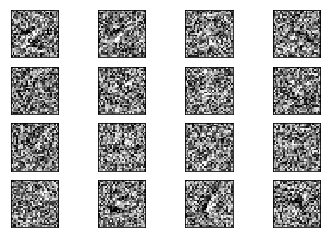

In [3]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(200, 100,60,30,10), max_iter=400, alpha=1e-4,
                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
'''
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
'''
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [25]:
MLPClassifier(verbose=True,warm_start=True).fit(X_train,y_train)

Iteration 1, loss = 0.58222317
Iteration 2, loss = 0.26383552
Iteration 3, loss = 0.21111508
Iteration 4, loss = 0.17590192
Iteration 5, loss = 0.15070966
Iteration 6, loss = 0.12950719
Iteration 7, loss = 0.11354796
Iteration 8, loss = 0.09871257
Iteration 9, loss = 0.08831940


D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=True)

In [23]:
y_predict=nn.predict(X_test)
print('Test accuracy of neural network with default settings')
print(accuracy_score(y_test,y_predict))
y_predict_train=nn.predict(X_train)
print('Train accuracy of neural network with default settings')
print(accuracy_score(y_train,y_predict_train))

Test accuracy of neural network with default settings
0.965047619048
Train accuracy of neural network with default settings
0.995587301587


In [94]:
# let's try by just 10 neurons
nn10=MLPClassifier(hidden_layer_sizes=10).fit(X_train,y_train)

In [96]:
y_predict=nn10.predict(X_test)
print('Test accuracy of neural network with 10 neurons')
print(accuracy_score(y_test,y_predict))
y_predict_train=nn10.predict(X_train)
print('Train accuracy of neural network with 10 neurons')
print(accuracy_score(y_train,y_predict_train))

Test accuracy of neural network with 10 neurons
0.928952380952
Train accuracy of neural network with 10 neurons
1.0


In [98]:
nnm=MLPClassifier(hidden_layer_sizes=[200,100,60,30,10]).fit(X_train,y_train)

In [99]:
y_predict=nnm.predict(X_test)
print('Test accuracy of neural network with 10 neurons')
print(accuracy_score(y_test,y_predict))
y_predict_train=nnm.predict(X_train)
print('Train accuracy of neural network with 10 neurons')
print(accuracy_score(y_train,y_predict_train))

Test accuracy of neural network with 10 neurons
0.974761904762
Train accuracy of neural network with 10 neurons
1.0


In [110]:
df=pd.DataFrame([])
df['ImageId']=np.arange(1,len(test_data)+1)
df['Label']=nnm.predict(test_data)

In [111]:
df.to_csv('nn1trial.csv',index=False)

In [113]:
df.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [ ]:
nnm2=MLPClassifier(hidden_layer_sizes=[200,100,60,30,10],max_iter=1000).fit(X_train,y_train)

In [ ]:
y_predict=nnm2.predict(X_test,verbose=true)
print('Test accuracy of neural network with 10 neurons')
print(accuracy_score(y_test,y_predict))
y_predict_train=nnm2.predict(X_train)
print('Train accuracy of neural network with 10 neurons')
print(accuracy_score(y_train,y_predict_train))

In [109]:
nnm2

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[200, 100, 60, 30, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [4]:
nnm2

NameError: name 'nnm2' is not defined

In [23]:
param_grid={'activation':[10,100,500,1000] }

In [35]:
# Lets start with default settings. To use is as benchmark
nn=MLPClassifier().fit(X_train,y_train)

In [36]:
y_predict_nn=nn.predict(X_test)

In [37]:
print('Accuracy of MLPClassifier with default settings is:')
print(accuracy_score(y_test,y_predict_nn))

Accuracy of MLPClassifier with default settings is:
0.943238095238


In [38]:
nn

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [39]:
nn3=MLPClassifier(hidden_layer_sizes=(1000, 500, 300,200,100)).fit(X_train,y_train)

In [40]:
y_predict_nn3=nn3.predict(X_test)
print('Accuracy of MLPClassifier with 3 layer[1000, 500, 300,200,100] settings is:')
print(accuracy_score(y_test,y_predict_nn3))

Accuracy of MLPClassifier with 3 layer[1000, 500, 300,200,100] settings is:
0.969238095238


### Results are not impressive in fact it is not better than random forrest classifier. Tunning parameters is eccential. we will change alpha and learning rate

In [31]:
nn3.max_iter

1200

In [41]:
nn4=MLPClassifier(hidden_layer_sizes=(1000, 500, 300,200,100), max_iter=1200).fit(X_train,y_train)

In [43]:
y_predict_nn4=nn4.predict(X_test)
print('Accuracy of MLPClassifier with 3 layer[200,100,500] settings is:')
print(accuracy_score(y_test,y_predict_nn4))

Accuracy of MLPClassifier with 3 layer[200,100,500] settings is:
0.965714285714


In [67]:
nn4.hidden_layer_sizes

10

In [65]:
# Lets just try to use 10 neurons
nn4=MLPClassifier(hidden_layer_sizes=[10],max_iter=1000,activation='relu').fit(X_train,y_train)

In [68]:
y_predict_nn4=nn4.predict(X_test)
print('Accuracy of MLPClassifier with 1 layer, 10 neurons  settings is:')
print(accuracy_score(y_test,y_predict_nn4))

Accuracy of MLPClassifier with 1 layer, 10 neurons  settings is:
0.870095238095


## This block will be used to train neural networks

In [44]:
layers=[784,374,187,93,46,28,14]
nn5=MLPClassifier(hidden_layer_sizes=layers).fit(X_train,y_train)

In [46]:
y_predict_nn5=nn5.predict(X_test)
print('Accuracy of MLPClassifier with[784,374,187,93,46,28,14] layer settings is:')
print(accuracy_score(y_test,y_predict_nn5))

Accuracy of MLPClassifier with[784,374,187,93,46,28,14] layer settings is:
0.967904761905


In [55]:
layers=[784]
nn6=MLPClassifier(hidden_layer_sizes=layers).fit(X_train,y_train)

In [57]:
y_predict_nn6=nn6.predict(X_test)
print('Accuracy of MLPClassifier with[784] layer settings is:')
print(accuracy_score(y_test,y_predict_nn6))

Accuracy of MLPClassifier with[784] layer settings is:
0.960952380952


In [53]:
nn6.hidden_layer_sizes

[784]

In [52]:
layers=[784,374,187,93,46,28,14] 
layers[:7]

[784, 374, 187, 93, 46, 28, 14]

In [1]:
layers=[784,374,187,93,46,28,14] # number of points is 784 pixels
accuracy=[]
for i in range(len(layers)):
    layer=layers[:(i+1)]
    nn=MLPClassifier(hidden_layer_sizes=layer).fit(X_train,y_train)
    y_predict=nn.predict(X_test)
    print('Accuracy of MLPClassifier with '+str(nn.hidden_layer_sizes) +' layer settings is:')
    print(accuracy_score(y_test,y_predict))
    accuracy.append(y_predict)
    

NameError: name 'MLPClassifier' is not defined

In [48]:
param_grid={'alpha':[0.0001,0.001,0.01,0.1,1,10] }
grid=GridSearchCV(MLPClassifier(hidden_layer_sizes=[10],random_state=7),param_grid,cv=3,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [49]:
grid.grid_scores_

[mean: 0.79924, std: 0.02996, params: {'alpha': 0.0001},
 mean: 0.77857, std: 0.08257, params: {'alpha': 0.001},
 mean: 0.80422, std: 0.05476, params: {'alpha': 0.01},
 mean: 0.79251, std: 0.07973, params: {'alpha': 0.1},
 mean: 0.88752, std: 0.01199, params: {'alpha': 1},
 mean: 0.90698, std: 0.01081, params: {'alpha': 10}]

In [58]:
param_grid={'alpha':[20,40,60,80,100] }
grid=GridSearchCV(MLPClassifier(hidden_layer_sizes=[10],random_state=7),param_grid,cv=3,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [20, 40, 60, 80, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [55]:
grid.grid_scores_

[mean: 0.90178, std: 0.01438, params: {'alpha': 20},
 mean: 0.91349, std: 0.00562, params: {'alpha': 40},
 mean: 0.90330, std: 0.01957, params: {'alpha': 60},
 mean: 0.90775, std: 0.01284, params: {'alpha': 80},
 mean: 0.90413, std: 0.00274, params: {'alpha': 100}]

In [65]:
nn=MLPClassifier(hidden_layer_sizes=[10],random_state=7,alpha=40,max_iter=1000).fit(X_train,y_train)

In [66]:
y_pred=nn.predict(X_test)
accuracy_score(y_test,y_pred)

0.91780952380952385

In [64]:
nn

MLPClassifier(activation='relu', alpha=40, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[200, 100, 60, 30, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [63]:
nn=MLPClassifier(hidden_layer_sizes=[200,100,60,30,10],random_state=7,alpha=40,learning_rate='decay').fit(X_train,y_train)

ValueError: learning rate decay is not supported. 

In [60]:
y_pred=nn.predict(X_test)
accuracy_score(y_test,y_pred)

0.89361904761904765

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320


/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 0.985733
Test set score: 0.971000


<IPython.core.display.Javascript object>


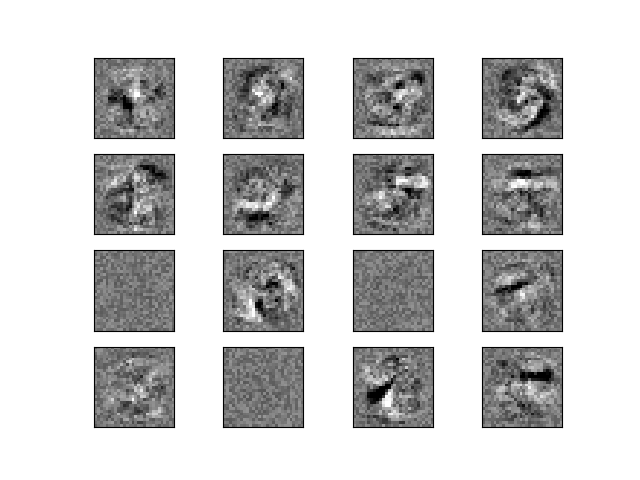

In [67]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()